In [1]:
import sklearn
import pandas as pd
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()
test = pd.read_csv('test.csv')

In [3]:
train['birth_date']
train_len = len(train)

In [4]:
train['brith_date_format'] = pd.to_datetime(train['birth_date'], format='%m/%d/%y')
test['brith_date_format'] = pd.to_datetime(test['birth_date'], format='%m/%d/%y')
date_data = pd.concat([train['brith_date_format'],test['brith_date_format']])

In [5]:
import datetime as DT
import numpy as np
now = pd.Timestamp(DT.datetime.now())
age = date_data.where(date_data < now, date_data -  np.timedelta64(100, 'Y'))   # 2
age = (now - date_data).astype('<m8[Y]')    # 3
age = pd.Series(age)
age.head()
train['age']= age[:train_len]
test['age']= age[train_len:]
train = train.drop(columns=['birth_date','brith_date_format'])
test = test.drop(columns=['birth_date','brith_date_format'])

In [6]:
train['is_keeper'] = train['gk'].notnull()
test['is_keeper'] = test['gk'].notnull()

In [7]:
train = train.fillna(0);
test = test.fillna(0);

In [8]:
train.isnull().sum().nlargest(10)
print(train.shape)

(10441, 66)


In [9]:
train_Y = train['y']

In [10]:
# train = train.fillna(train.mean())
# test = test.fillna(test.mean())
# train.isnull().sum().nlargest(10)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score


In [12]:
train = train.drop(columns=['id','y'])

train_x,cv_x,train_y,cv_y = train_test_split(train,train_Y)

In [13]:
train = pd.get_dummies(train)
rf = RandomForestRegressor()

In [14]:
train.head()

,club,league,height_cm,weight_kg,nationality,potential,pac,sho,pas,dri,...,lb,gk,age,is_keeper,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium,work_rate_def_High,work_rate_def_Low,work_rate_def_Medium
0,293,25,177,72,78,73,65,60,63,67,...,56.0,0.0,21.0,False,0,0,1,0,0,1
1,258,24,178,70,51,62,56,39,60,63,...,64.0,0.0,33.0,False,0,0,1,1,0,0
2,112,3,177,69,52,68,68,57,39,55,...,36.0,0.0,18.0,False,0,0,1,0,0,1
3,604,9,181,81,54,81,76,74,74,77,...,78.0,0.0,29.0,False,1,0,0,1,0,0
4,80,37,179,75,96,72,40,62,74,71,...,64.0,0.0,37.0,False,0,0,1,0,0,1


In [15]:

cv = cross_val_score(rf, train, train_Y, scoring='neg_mean_absolute_error') 

In [16]:
print(cv.mean())

-34.16154050009851


In [17]:
rf.fit(train,train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
tid = test['id']
test = test.drop(columns=['id'])
test = pd.get_dummies(test)
test_predict_y = rf.predict(test)

In [20]:
sumbit = pd.DataFrame({'id':tid,'y':test_predict_y})
sumbit.to_csv('submit.rf.csv',index=False)

In [21]:
rf.feature_importances_

array([1.94441617e-03, 6.68610900e-04, 6.32359515e-04, 7.83820742e-04,
       1.18750175e-03, 4.87427783e-01, 4.07014084e-04, 1.33859169e-03,
       9.62577470e-04, 1.06951938e-02, 2.41382482e-03, 1.54210620e-03,
       1.28932380e-01, 7.95147542e-05, 2.99979155e-04, 7.73449386e-05,
       1.04134586e-03, 1.42483617e-03, 1.24304326e-03, 9.83964135e-04,
       5.12164849e-04, 3.05505179e-04, 6.08096737e-04, 1.26849703e-03,
       7.07306362e-04, 1.54655010e-03, 2.43743241e-04, 1.37806740e-03,
       9.33261419e-04, 6.08399055e-02, 3.06951459e-04, 2.26554316e-03,
       1.55146183e-03, 1.03038216e-03, 1.66105611e-03, 8.11271443e-04,
       1.13803063e-03, 1.63355314e-03, 1.42294381e-03, 6.79198447e-04,
       1.15490790e-03, 7.60265887e-04, 1.54747070e-03, 1.25017478e-03,
       8.90964637e-04, 3.53317460e-03, 7.55967526e-04, 5.76143593e-04,
       1.57889110e-03, 6.22567934e-04, 1.37738106e-03, 5.02232919e-03,
       3.38194879e-03, 1.64134552e-01, 1.32185201e-02, 2.18099840e-03,
      

In [22]:
from matplotlib import pyplot
train.columns.shape,rf.feature_importances_.shape

((68,), (68,))

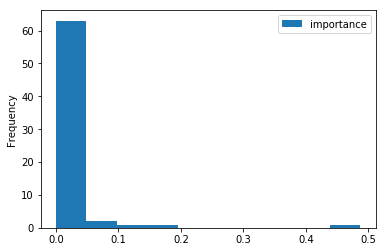

In [23]:
fi = pd.DataFrame({'name':train.columns,'importance':rf.feature_importances_})
fi.plot.hist()

In [24]:
fi.nlargest(20,'importance')

,importance,name
5,0.487428,potential
53,0.164135,cf
12,0.128932,international_reputation
29,0.060840,reactions
57,0.048841,cb
60,0.016653,age
54,0.013219,cam
9,0.010695,dri
51,0.005022,st
45,0.003533,gk_handling


In [35]:
from sklearn.svm import SVR
svr_model = SVR(C=100)
cv_svr = cross_val_score(svr_model, train, train_Y, scoring='neg_mean_absolute_error') 
print('model svr:',-cv_svr.mean())

model svr: 196.01641745338327


In [26]:
# from sklearn.model_selection import GridSearchCV
# parameters = { 'C':[0.1,1, 10,100]}
# clf = GridSearchCV(svr_model, parameters)
# clf.fit(train,train_Y)
# clf.best_params_  # 100

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
cv_gbr = cross_val_score(gbr, train, train_Y, scoring='neg_mean_absolute_error') 
print('model gbr:',-cv_gbr.mean())

model gbr: 32.594580520169195


In [49]:
gbr.fit(train,train_Y)
test_predict_gbr = gbr.predict(test)
sumbit = pd.DataFrame({'id':tid,'y':test_predict_gbr})
sumbit.to_csv('submit.gbr.csv',index=False)

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso()
cv_lasso = cross_val_score(lasso, train, train_Y, scoring='neg_mean_absolute_error') 
print('model lasso:',-cv_lasso.mean())

C:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


model lasso: 150.09109456303173


C:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [58]:
lasso.fit(train,train_Y)
test_predict_lasso = gbr.predict(test)
sumbit = pd.DataFrame({'id':tid,'y':test_predict_lasso})
sumbit.to_csv('submit.lasso.csv',index=False)

C:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge()
cv_ridge = cross_val_score(ridge, train, train_Y, scoring='neg_mean_absolute_error') 
print('model ridge:',-cv_ridge.mean())

model ridge: 150.3302725607044


In [57]:
from sklearn.tree import ExtraTreeRegressor
et = ExtraTreeRegressor(min_samples_split=4)
cv_et = cross_val_score(et, train, train_Y, scoring='neg_mean_absolute_error') 
print('model et:',-cv_et.mean())

model et: 57.72519947503745


In [60]:
et.fit(train,train_Y)
test_predict_et = gbr.predict(test)
sumbit = pd.DataFrame({'id':tid,'y':test_predict_et})
sumbit.to_csv('submit.et.csv',index=False)

In [64]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=10)
cv_ab = cross_val_score(ab, train, train_Y, scoring='neg_mean_absolute_error') 
print('model ab:',-cv_ab.mean())

model ab: 100.13363654667181


In [66]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(GradientBoostingRegressor(**params))
cv_br = cross_val_score(br, train, train_Y, scoring='neg_mean_absolute_error') 
print('model br:',-cv_br.mean())

KeyboardInterrupt: 

In [67]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train)
cv_X_train_minmax = cross_val_score(rf, X_train_minmax, train_Y, scoring='neg_mean_absolute_error') 
X_train_minmax.mean()

0.4726272228816527

In [68]:
rf.fit(X_train_minmax,train_Y)
test_min_max = min_max_scaler.transform(test)
test_predict_rf_maxmin = gbr.predict(test)
sumbit = pd.DataFrame({'id':tid,'y':test_predict_rf_maxmin})
sumbit.to_csv('submit.rf.maxmin.csv',index=False)